In [110]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [27]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.177719,77167900
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.022552,76161100
2023-03-17,156.080002,156.740005,154.279999,155.000000,154.177063,98944600
2023-03-20,155.070007,157.820007,154.149994,157.399994,156.564301,73641400
2023-03-21,157.320007,159.399994,156.539993,159.279999,158.434326,73938300
...,...,...,...,...,...,...
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500
2024-03-12,173.149994,174.029999,171.009995,173.229996,173.229996,59825400


In [29]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,180.021072,181.489396,178.701151,180.206865,179.711150,5.739631e+07
std,10.479806,10.306061,10.394080,10.292109,10.406224,1.678591e+07
min,151.190002,153.250000,149.919998,152.990005,152.177719,2.404830e+07
25%,172.985001,174.172504,171.645004,173.172497,172.645992,4.678918e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048981,5.340815e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.392830e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [30]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-15 to 2024-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<Axes: xlabel='Date'>

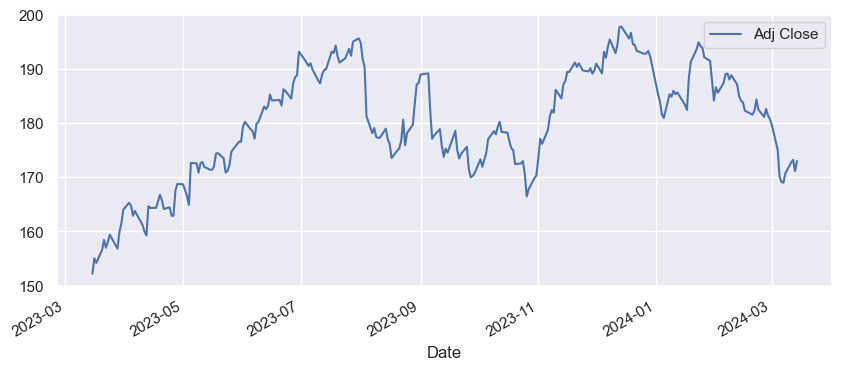

In [64]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

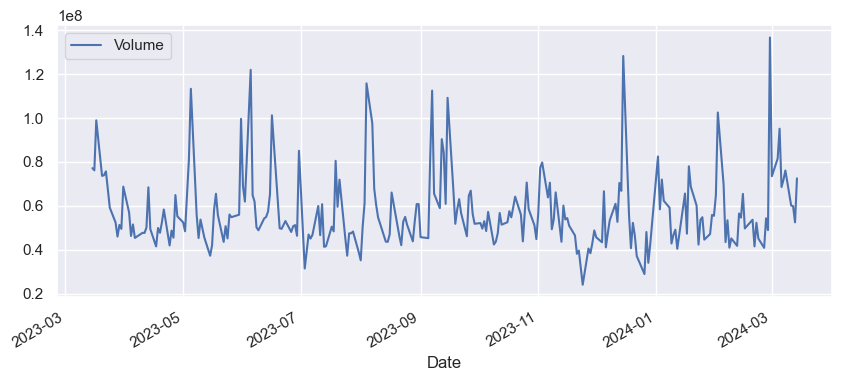

In [37]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [41]:
ma_day = [5, 10, 20, 50]

for ma in ma_day:
    column_name = "%s day MA" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

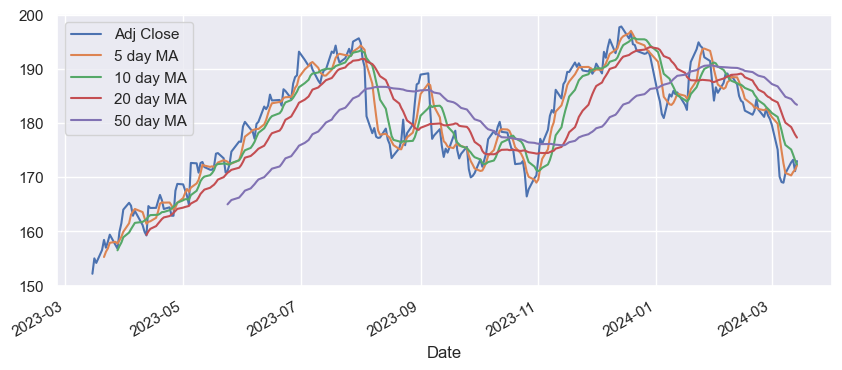

In [46]:
AAPL[['Adj Close', '5 day MA', '10 day MA', '20 day MA', '50 day MA']].plot(subplots=False, figsize=(10,4))

<Axes: xlabel='Date'>

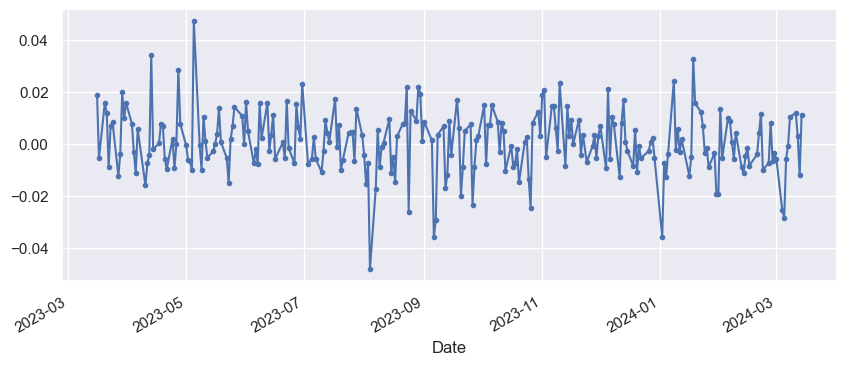

In [54]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(subplots=False, figsize=(10,4), linestyle='-', marker='.')

<Axes: xlabel='Daily Return', ylabel='Count'>

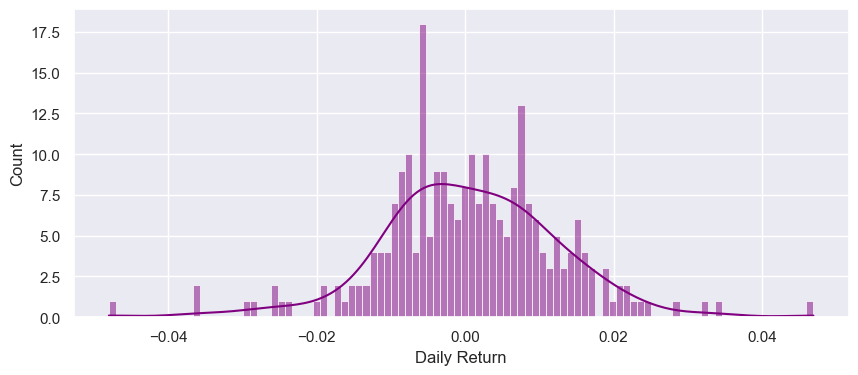

In [60]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple', kde=True)


In [65]:
close = pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [66]:
close.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-15,152.177719,96.199997,96.550003,263.279175
2023-03-16,155.022537,100.040001,101.070000,273.951630
2023-03-17,154.177048,98.949997,102.459999,277.155334
2023-03-20,156.564301,97.709999,101.930000,270.013916
2023-03-21,158.434311,100.610001,105.839996,271.551331


In [67]:
close1 = close.pct_change()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

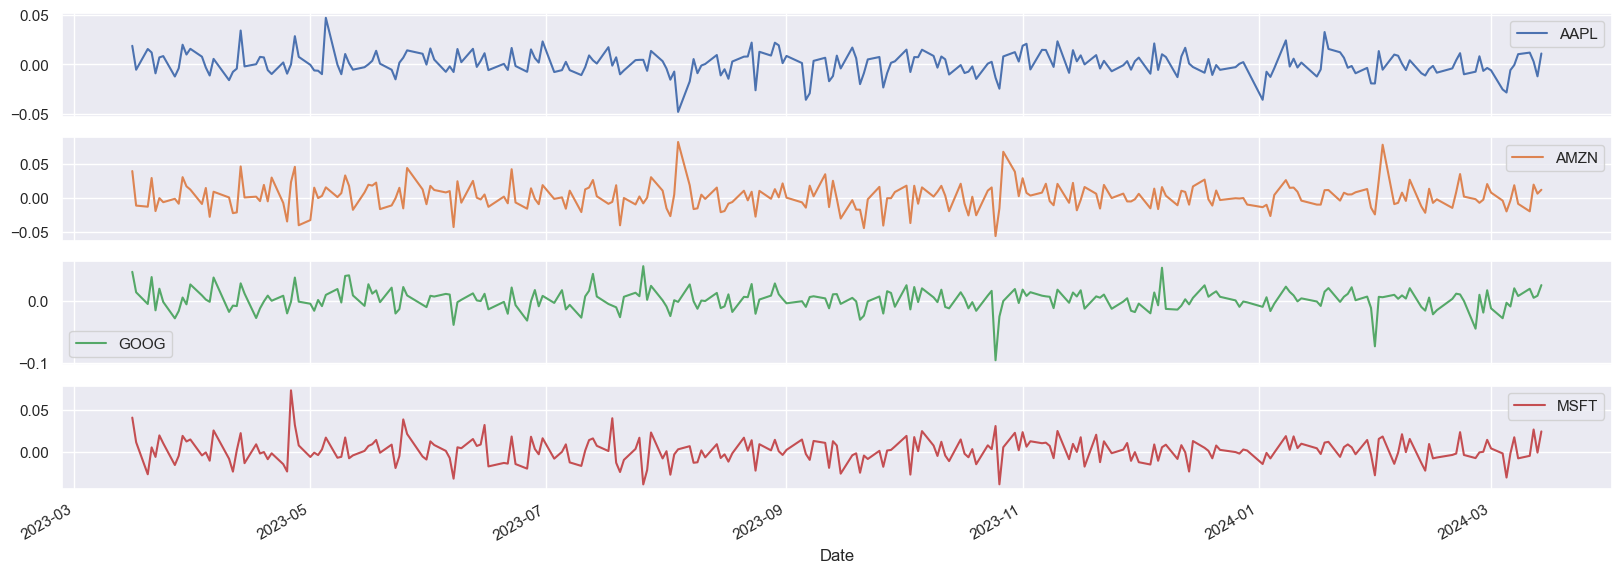

In [72]:
close1.plot(subplots=True, figsize=(20,7))

<Axes: xlabel='Date'>

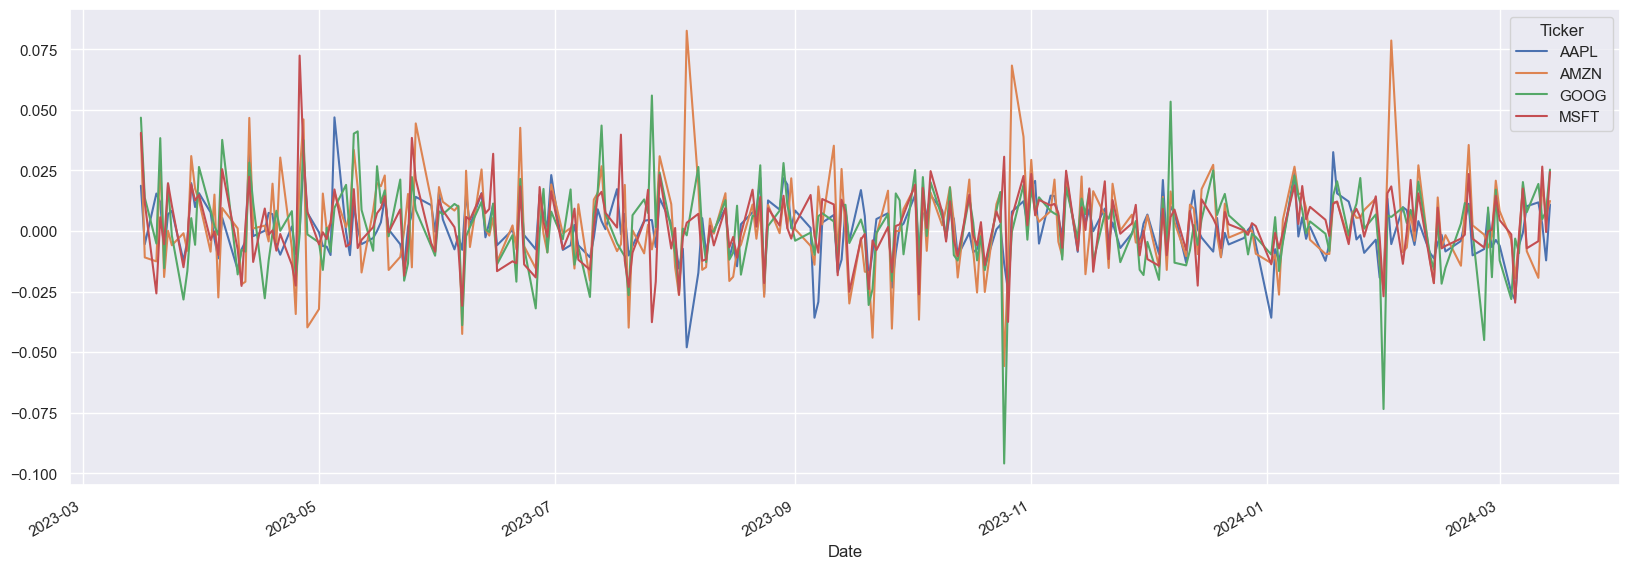

In [73]:
close1.plot(subplots=False, figsize=(20,7))

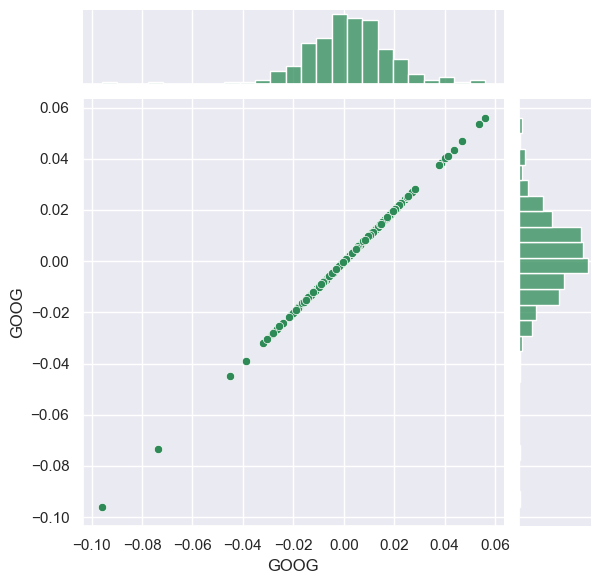

In [80]:
sns.jointplot(x='GOOG',y='GOOG',data=close1,kind='scatter', color="seagreen")


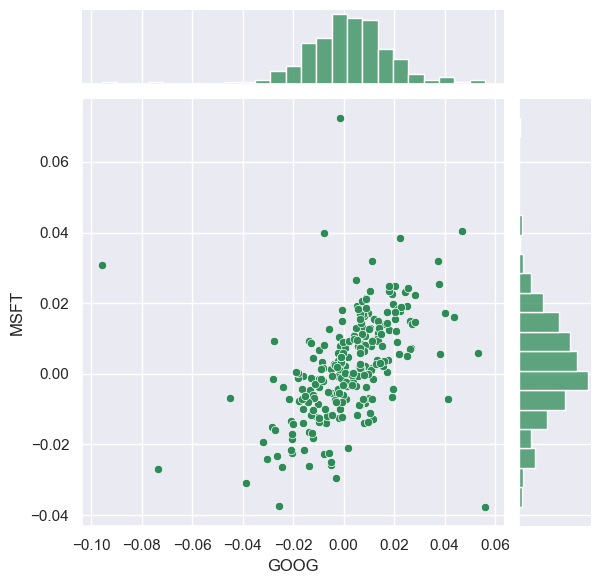

In [81]:
sns.jointplot(x='GOOG',y='MSFT',data=close1,kind='scatter', color="seagreen")


In [95]:
close1 = close1.dropna()
from scipy.stats import pearsonr
pearsonr(close1['MSFT'], close1['GOOG'])

PearsonRResult(statistic=0.45823147949568827, pvalue=1.9599478888525878e-14)

C:\Users\aruna\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


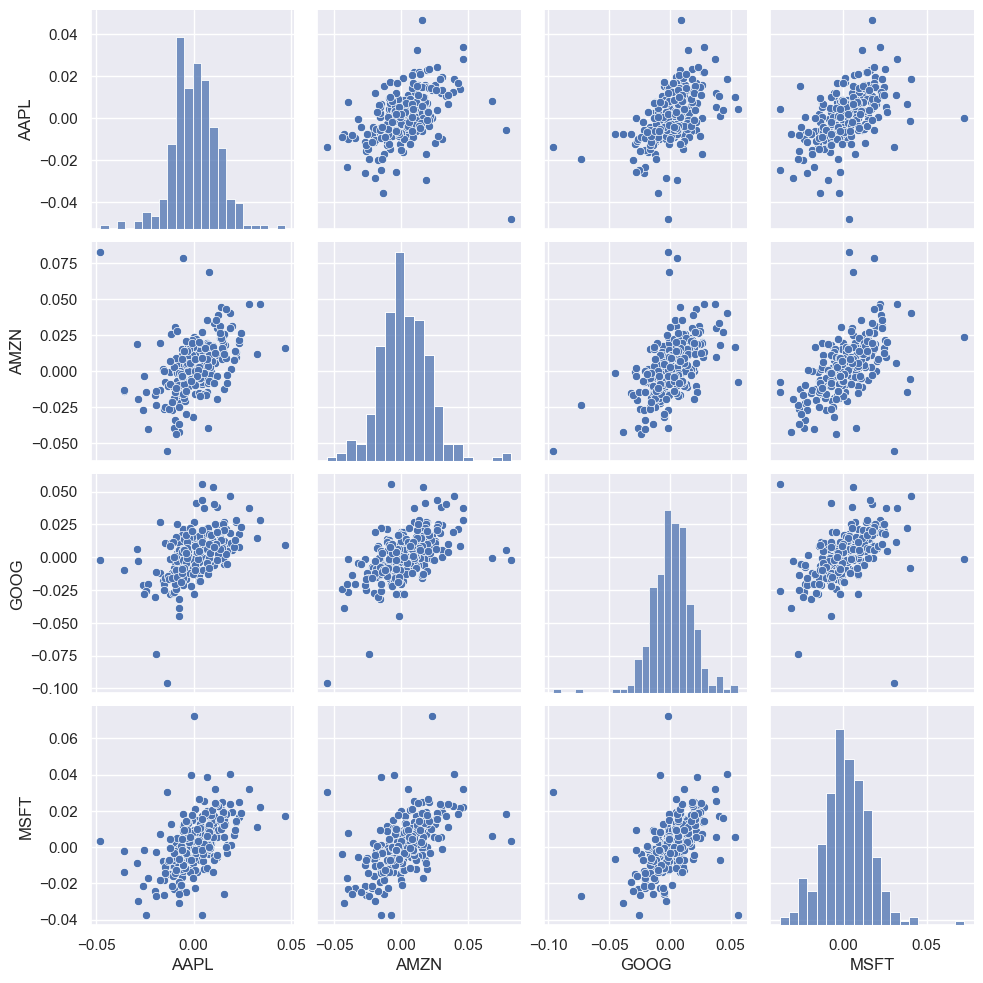

In [96]:
sns.pairplot(close1)


In [97]:
pearsonr(close1['AMZN'], close1['GOOG'])

PearsonRResult(statistic=0.5437694237808955, pvalue=1.0254872470472152e-20)

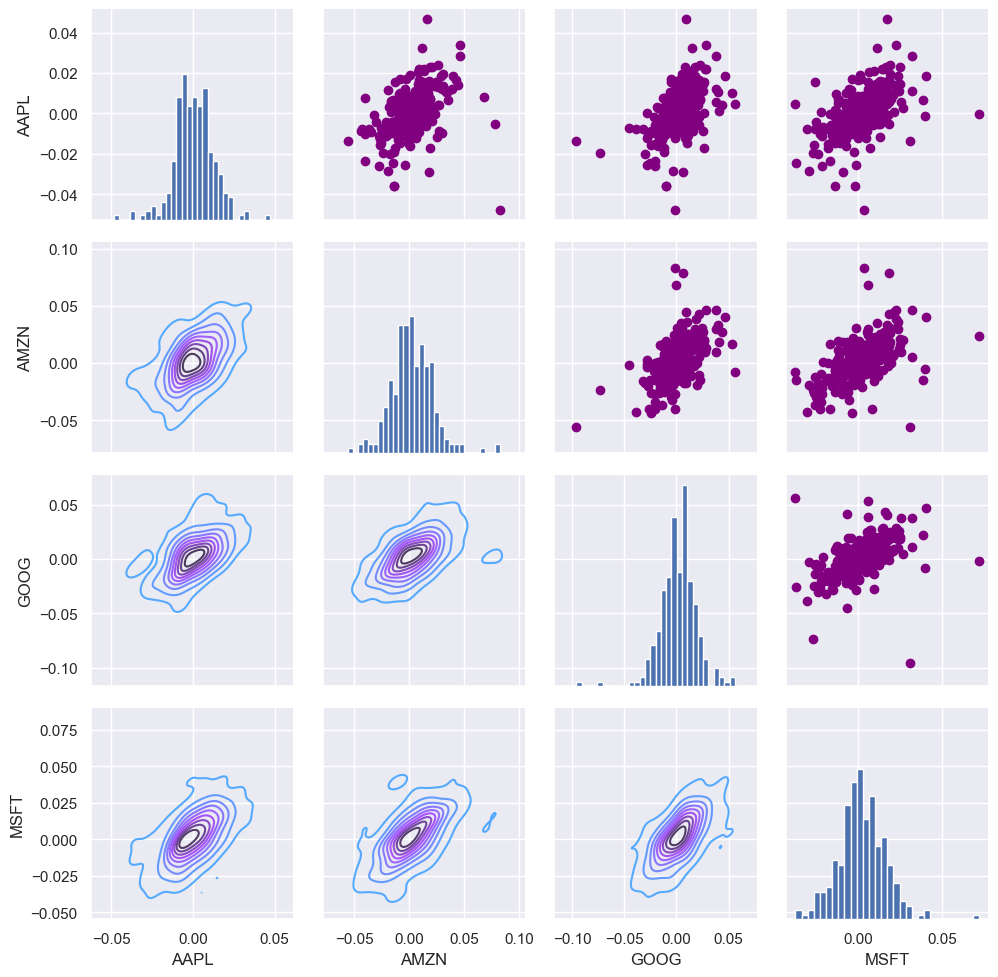

In [98]:
returns_fig = sns.PairGrid(close1)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

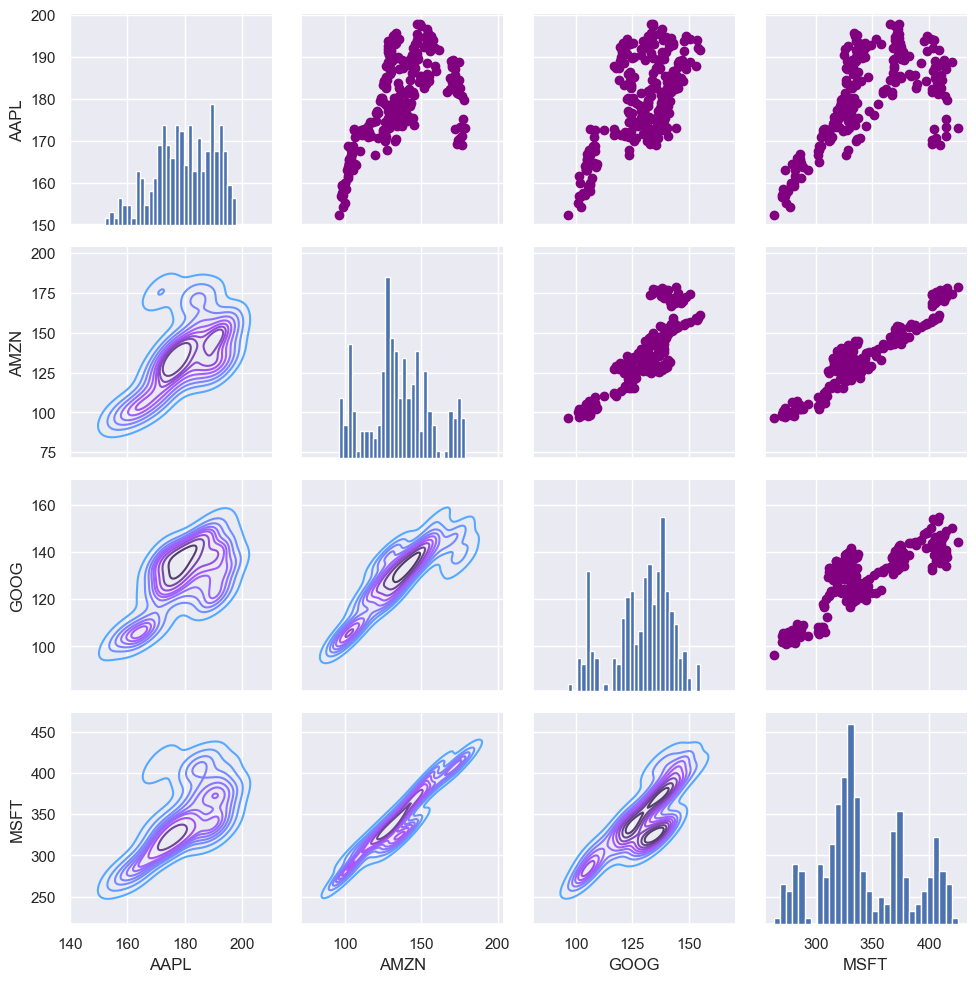

In [99]:
returns_fig = sns.PairGrid(close)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

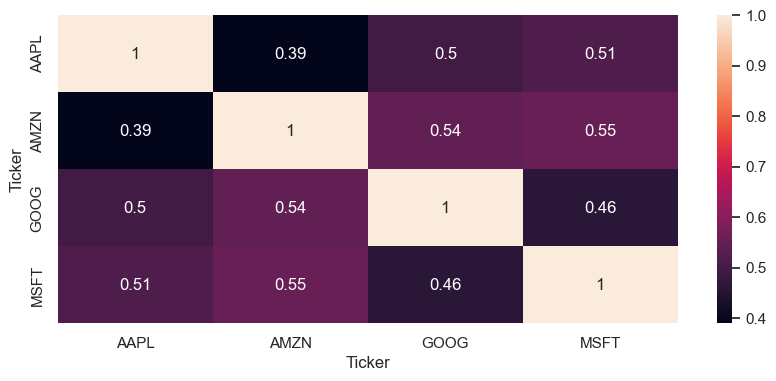

In [106]:
sns.heatmap(close1.corr(), annot=True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

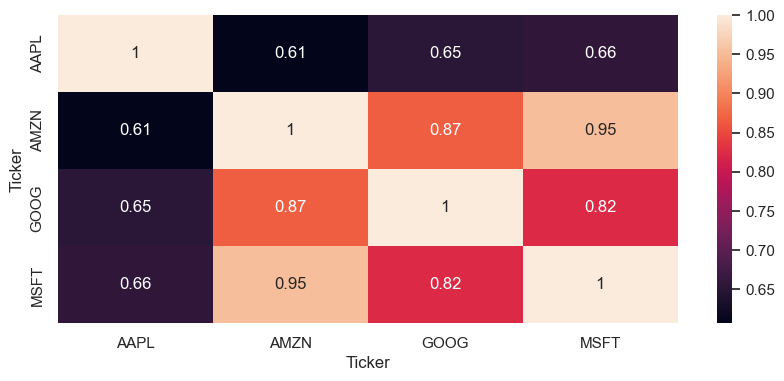

In [107]:
sns.heatmap(close.corr(), annot=True)

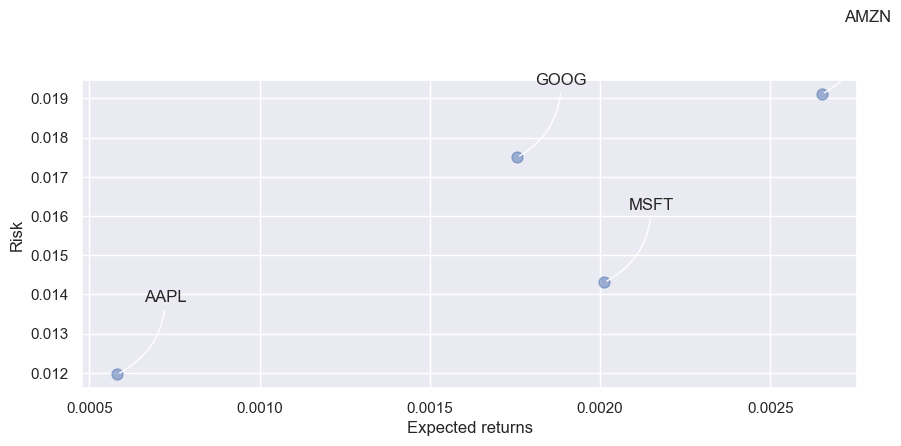

In [112]:
area = np.pi*20
plt.scatter(close1.mean(), close1.std(),alpha = 0.5,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(close1.columns, close1.mean(), close1.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

<Axes: xlabel='Daily Return', ylabel='Count'>

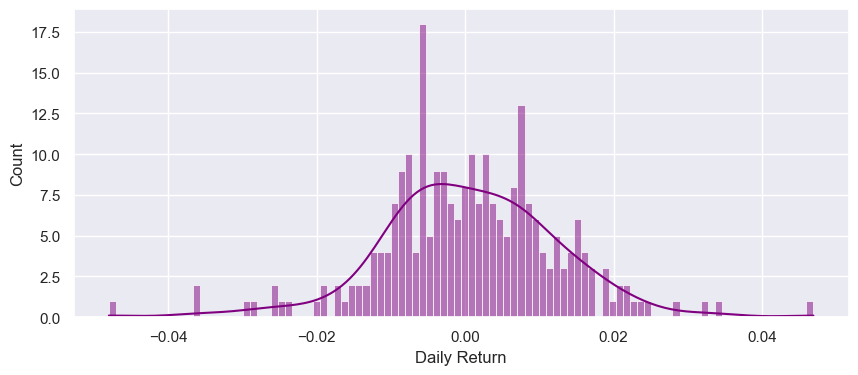

In [111]:
sns.histplot(AAPL['Daily Return'], kde=True, bins=100, color='purple')

In [118]:
close1['AAPL'].quantile(0.05)

-0.017157233231897495

## Value at Risk (VaR)

We can predict the value at risk from the quantile of 0.05 ie 0.017. It can be said with 95% confidence that our worst daily loss will not exceed 1.7% of the amount invested. For example, in 95 cases out of 100, if we invest USD 1,000, the worst daily loss will be 1,000 * 1.7% or USD 17.

In [140]:
# Monte-Carlo Simulation
days = 365

dt = 1/days

mu = close1.mean()['GOOG']

sigma = close1.std()['GOOG']

In [141]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    
    return price

In [142]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300
2023-03-16,96.570000,101.970001,95.870003,101.070000,101.070000,54499500
2023-03-17,100.839996,103.489998,100.750000,102.459999,102.459999,76140300
2023-03-20,101.059998,102.580002,100.790001,101.930000,101.930000,26033900
2023-03-21,101.980003,105.959999,101.860001,105.839996,105.839996,33122800


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

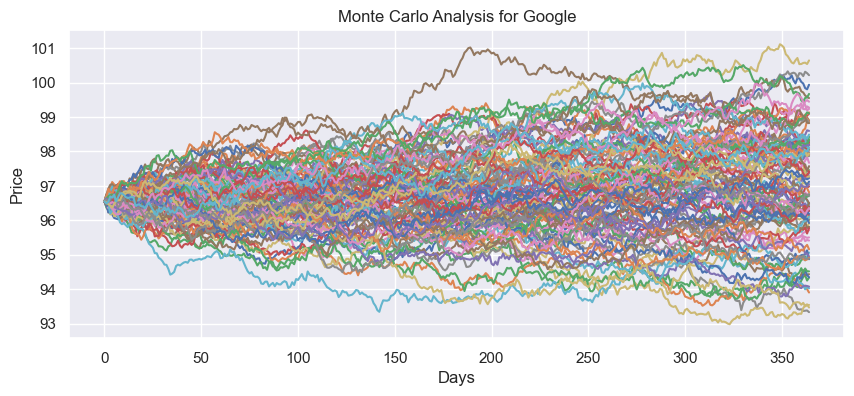

In [143]:
for run in range(100):
    plt.plot(stock_monte_carlo(96.550003, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
    

In [144]:
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-08,135.035004,138.985001,134.800003,136.289993,136.289993,26472400
2024-03-11,137.070007,139.979996,137.070007,138.940002,138.940002,22536400
2024-03-12,138.250000,140.279999,138.210007,139.619995,139.619995,19019700
2024-03-13,140.059998,142.190002,140.009995,140.770004,140.770004,19637000
2024-03-14,142.214996,144.729996,141.485001,144.339996,144.339996,35969086


In [145]:
runs = 50000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(96.550003, days, mu, sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

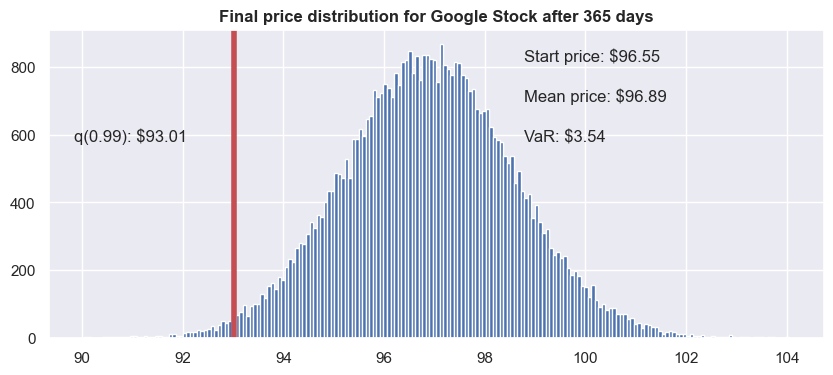

In [146]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %(96.550003))
plt.figtext(0.6, 0.7, s="Mean price: $%.2f" %simulations.mean())
plt.figtext(0.6, 0.6, s="VaR: $%.2f" %(96.550003-q))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

## Reason for mismatch between Mean Price from MCS and Actual Price

There is a large variation between the mean price after 365 expected from the Monte Carlo simulation of 50,000 runs (ie USD 96.88), and the actual price of the stock found after 365 days from our data (ie USD 144.34). This is due to the choice of our model for the MCS as the Generalized Brownian Motion model. The random walk predicted from this model and the choice of the epsilon term within the shock term are both done with the assumption of a normal distribution, which leads to the final prices of the stock to also be almost normally distributed around the starting price (although it is a bit skewed to the right, due to valid reasons). Hence, there is a discrepancy between the predicted value from the MCS and the Actual Price after 365 days.